## Name : Snehal  shyam Jagtap

## Assignment No 18



### Neural Network
In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

## 1. Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

In [3]:
# Data Exploration
print(data.head())        # View first few rows
print(data.info())        # Check for missing values and data types

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbo

## 3. Split Features (X) and Labels (y)

In [4]:
# Split features (X) and labels (y)
X = data.iloc[:, :-1]  # Features (could contain categorical data)
y = data.iloc[:, -1]   # Target labels (alphabets)

In [5]:
# Check if there are any categorical columns in X
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"Categorical Columns in X: {categorical_columns}")

Categorical Columns in X: Index(['letter'], dtype='object')


## 4. One-Hot Encoding of Categorical Columns

In [6]:
# Apply One-Hot Encoding to categorical features, if any
if len(categorical_columns) > 0:
    column_transformer = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')  # Keep other numerical columns as they are
    X = column_transformer.fit_transform(X)
    print("After One-Hot Encoding, shape of X:", X.shape)
else:
    print("No categorical columns found.")

After One-Hot Encoding, shape of X: (20000, 41)


## 5. Label Encoding for Target Labels

In [7]:
# Encode the target labels (if they are categorical, like letters)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Unique classes in y:", np.unique(y))

Unique classes in y: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


## 6. Splitting Dataset into Training and Testing Sets

In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [9]:
#Check the shape of the splits
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training Set: X_train: (16000, 41), y_train: (16000,)
Test Set: X_test: (4000, 41), y_test: (4000,)


## 7. Normalizing Feature Data

In [10]:
# Normalize the feature data (only for numerical columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print("Feature data normalized.")

Feature data normalized.


## 8. Build the ANN Model

In [12]:
# Build the ANN model
model = Sequential()

In [13]:
# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

In [14]:
# Second hidden layer
model.add(Dense(units=32, activation='relu'))

In [15]:
# Output layer (using softmax for multiclass classification)
model.add(Dense(units=len(np.unique(y)), activation='softmax'))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
print("Model compiled.")

Model compiled.


## 9. Training the Model

In [18]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

print("Model training completed.")

Epoch 1/30
500/500 [==============================] - 2s 2ms/step - loss: 1.5192 - accuracy: 0.4606 - val_loss: 1.2416 - val_accuracy: 0.5415
Epoch 2/30
500/500 [==============================] - 1s 3ms/step - loss: 1.1648 - accuracy: 0.5480 - val_loss: 1.1091 - val_accuracy: 0.5750
Epoch 3/30
500/500 [==============================] - 1s 2ms/step - loss: 1.0574 - accuracy: 0.5901 - val_loss: 1.0312 - val_accuracy: 0.6005
Epoch 4/30
500/500 [==============================] - 1s 2ms/step - loss: 0.9881 - accuracy: 0.6151 - val_loss: 0.9871 - val_accuracy: 0.6100
Epoch 5/30
500/500 [==============================] - 1s 2ms/step - loss: 0.9430 - accuracy: 0.6286 - val_loss: 0.9475 - val_accuracy: 0.6263
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 0.9064 - accuracy: 0.6436 - val_loss: 0.9333 - val_accuracy: 0.6305
Epoch 7/30
500/500 [==============================] - 1s 2ms/step - loss: 0.8769 - accuracy: 0.6521 - val_loss: 0.9117 - val_accuracy: 0.6375
Epoch 

## 10. Evaluating the Model

In [19]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

125/125 [==============================] - 0s 986us/step - loss: 0.8063 - accuracy: 0.6733
Test Accuracy: 67.33%


## 11. Making Predictions

In [20]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Display results
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

125/125 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    2    1    0    1    0    0    0    0    0    0    0    0    0
     0]
 [   0    3    0    0    0    0    1    1    1    0    0    0    0    0
     0]
 [   0    1    0   12   11    6    1    0    0    0    0    0    0    0
     0]
 [   0    1    0    6   46   29    8    2    0    1    0    1    0    0
     0]
 [   0    0    0    1   11  102   60   16    3    1    1    0    1    0
     0]
 [   0    0    0    0    2   22  220   89   15    4    0    1    0    0
     0]
 [   0    0    0    0    1   13   60  476  149   10    3    0    0    0
     0]
 [   0    0    0    0    1    3   13  196 1274   97    9    3    0    0
     0]
 [   0    0    0    0    0    0    7   20  106  274   70    7    0    1
     0]
 [   0    0    0    0    1    0    3    4   15   81  172   32    0    0
     0]
 [   0    0    0    0    1    0    2    0    2

C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 12. Plotting Training and Validation Accuracy

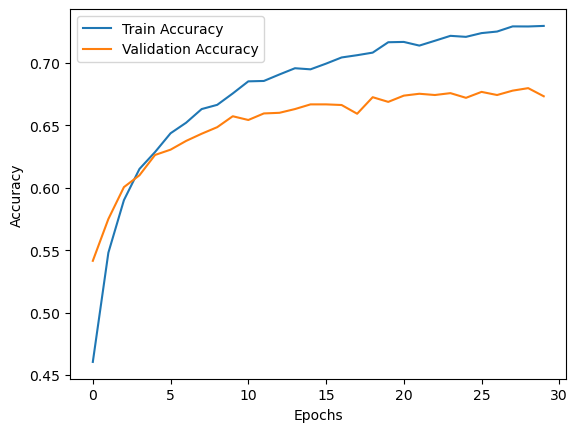

In [21]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()